# California Housing Price Prediction

California Housing Price Prediction using multivariate regression model

### Objectives

- Predict future house price using existing California housing data 
- Perform supervised learning to develop a powerful ML model
- We use Regeression model to predict the future house price
- As house price depends on many parameters, we build multivariate regression model
- Use Train/Test Split to split the data for training and testing
- Train our model with train data set
- Evaluate the model against our test dataset

### Understanding the data

<b>housing.csv</b>:  
We have downloaded housing.csv, which contains the block groups (or say districts) in California and some statistics about them from 1990 census data. This data has metrics such as population, households, median income, median housing price, and so on. Distances among the centroids of each block group was computed as measured in latitude and longitude. The data contained 20,640 observations on 10 variables. The dependent or target variable is median house value. Data cleaning and preprocessing is required. 

 [data source info](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). 

The columns are as follows: 
- longitude e.g. -122.23
- latitude e.g. 37.88
- housing_median_age e.g. 41.0
- total_rooms e.g. 880.0
- total_bedrooms e.g. 29.0
- population e.g. 322.0
- households e.g. 126.0
- median_income e.g. 8.3252
- median_house_value e.g. 452600.0
- ocean_proximity e.g. Near Bay

## Importing required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv("../data/housing.csv")

# take a look at the dataset
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Data Exploration

In [3]:
# Calculate the number of rows and columns
print(df.shape)
print(df.info())

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


1. There are <b>20,640</b> observations on <b>10</b> fields.
- The <b>total_bedrooms</b> has only <b>20,433</b> not null values, meaning that it has <b>207</b> missing values.
- All the attributes are <b>numerical</b>, except the <b>ocean_proximity</b> field, which type is <b>object</b>. 

We will take care of these two features in the following sections.

In [4]:
# Calculate statistics of each features using describe() method
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Lets look at the <b>ocean_proximity</b> field to find out what categories exist and how many districts belong to each category by using the <b>value_counts()</b> method:

In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Convert categorical data into integer type
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["ocean_proximity_code"] = ord_enc.fit_transform(df[["ocean_proximity"]])
df[["ocean_proximity", "ocean_proximity_code"]].head(3)

ocean_proximity  ocean_proximity_code
0        NEAR BAY                   3.0
1        NEAR BAY                   3.0
2        NEAR BAY                   3.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187c5668>,
      dtype=object)

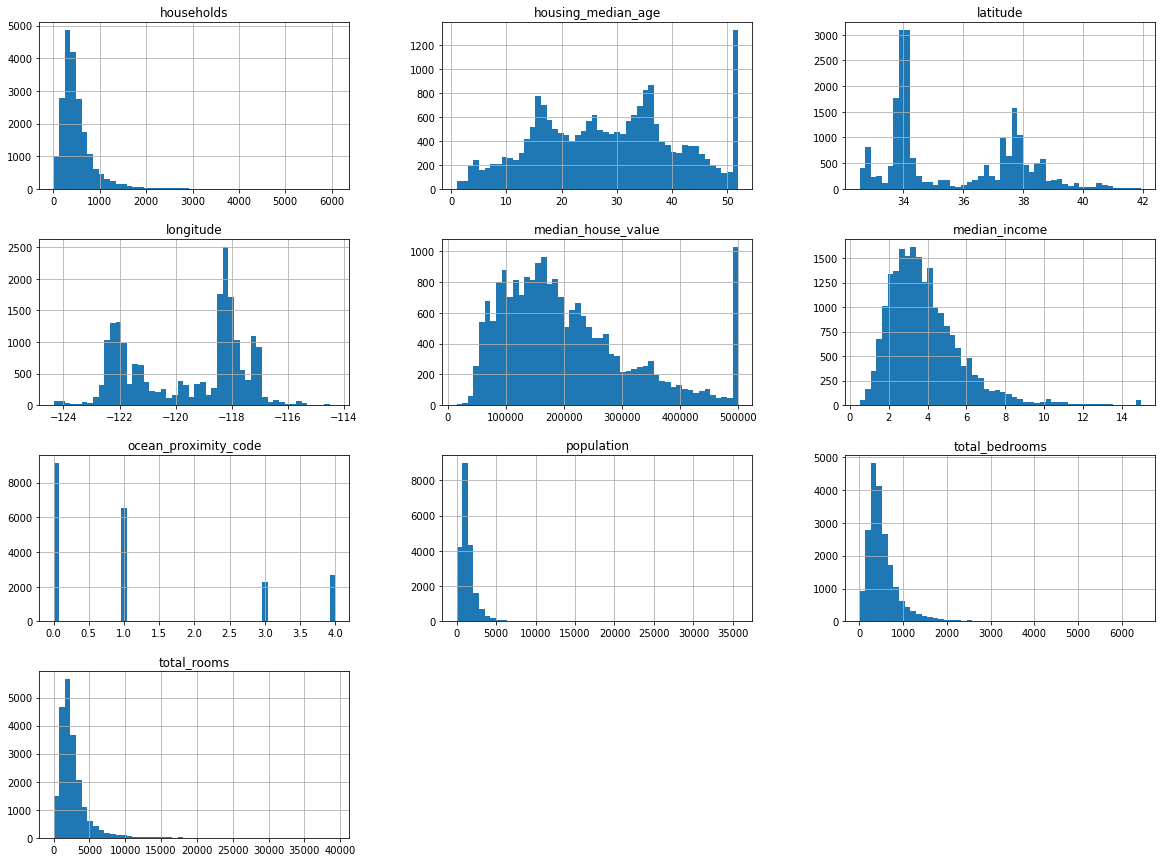

In [7]:
# Plot the distribution for each features
df.hist(bins=50, figsize=(20, 15))

1. The attributes are in different scales. So, normalization of scale is recommended. 
2. At <b>longitude</b> -118 and -122 degrees major houses are located.
3. At <b>latidute</b> 34, and 37 degrees major houses are located.
4. The <b>housing_median_age</b> has two peaks at 15 and 35, and max peak at 50. What does it mean? Are these years?
Does it mean that major houses in each district are more than 50 years old. 
5. Most distrcts or block groups have around 3000 <b>total_rooms</b>. 
6. Most distrcts or block groups have 300-600 <b>total_bedrooms</b>.
7. Most distrcts or block groups have <b>population</b> below 3000. Peak is around 4800.
8. Most distrcts or block groups have around 100-500 <b>households</b>.  
9. The <b>median_income</b> is centered around 3. Most people have income between 2-5. Propably, incomes are in dollars such as means $30000, $20000, and $50000. 
10. The <b>median_house_value</b> of most houes are below 260,000. A sudden peak near 500,000, which is different than others. What does it mean? analysis is required. As <b>median_house_value</b> is our dependent variable, these data needs to be carefully considered. It is recommended to exclude these data point in training the model. 

### Pre-process the data

In the dataset, the value of <b>median_income</b> is continuous. It needs to be converted into categorical type in order to properly split the entire data into train set and test set. We performed data stratification, i.e., the data set is divided into homogeneous subgroups called strata. In statistics, stratification is the process of dividing the rows of a data frame into subgroups that have common properties. You should not have too many strata, and each stratum should be large enough. We add a new categorical feature <b>income_cat</b> to our housing data.

The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories or strata, the max median_income is 15 in this case), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

In [8]:
df["income_cat"] = np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
print(df["income_cat"].value_counts())
print(df.income_cat)
print(len(df.income_cat))

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64
0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64
20640


In [9]:
df.income_cat.value_counts()/len(df.income_cat)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

### Creating train and test dataset

Now, we will split entire dataset into train and test dataset based on income categories. There are two ways to split dataset: (1) using <b>train_test_split</b> from sklearn.model_selection, and (2) using <b>StratifiedShuffleSplit</b> from sklearn.model_selection. 

Since we derived a new attribute <b>"income_cat"</b> by data stratification, we will use <b>StratifiedShuffleSplit</b> tecnique for splitting the data.

In [10]:
# 80% for traning, 20% for testing
from sklearn.model_selection import StratifiedShuffleSplit
split_df = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=4)
split_df

StratifiedShuffleSplit(n_splits=1, random_state=4, test_size=0.2,
            train_size=None)

In [11]:
# Calculate train and test index
for train_index, test_index in split_df.split(df, df["income_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

# Find the total rows and total columns in the train and test set 
train_set.shape, test_set.shape

((16512, 12), (4128, 12))

Now, we need to remove the <b>income_cat</b> field from our training and test data sets to go back to original state.

In [12]:
# Removing income_cat field from train_set and test_set 
train_set.drop(["income_cat"], axis=1, inplace=True)
test_set.drop(["income_cat"], axis=1, inplace=True)

Now, create a copy of training data set and plot the scatter plot

In [13]:
# create a copy of training data set and plot the scatter plot
train_set_copy = train_set.copy()

In [14]:
import plotly.express as px

fig = px.scatter_mapbox(train_set_copy, lat="latitude", lon="longitude", color="median_house_value", 
                  size=train_set_copy['population']/100, hover_name="median_house_value", hover_data=["population", "median_house_value"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=5, size_max=15, height=700, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    title="California Housing Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.write_image("../results/california_housing_prices_trainset_plotly.png")
fig.show()

1. The color represents the median price of the house
2. The radius of each circle represents the district's population 

#### Explore correlations between pairs using heatmap

In [15]:
fig = px.imshow(train_set_copy.corr())
fig.update_layout(
    title="California Housing",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.write_image("../results/california_housing_prices_trainset_correlation.png")
fig.show()

#### Let's look at the correlation matrix

In [16]:
corr_matrix = train_set_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687742
total_rooms             0.135814
housing_median_age      0.106751
ocean_proximity_code    0.078115
households              0.070866
total_bedrooms          0.054766
population             -0.021040
longitude              -0.049612
latitude               -0.139180
Name: median_house_value, dtype: float64

In [17]:
# corr_matrix

#### Let's find out if there is any correlation between the feature variables and target variables, and also between feature variables using scatter matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d8d9ef0>,
      dtype=object)

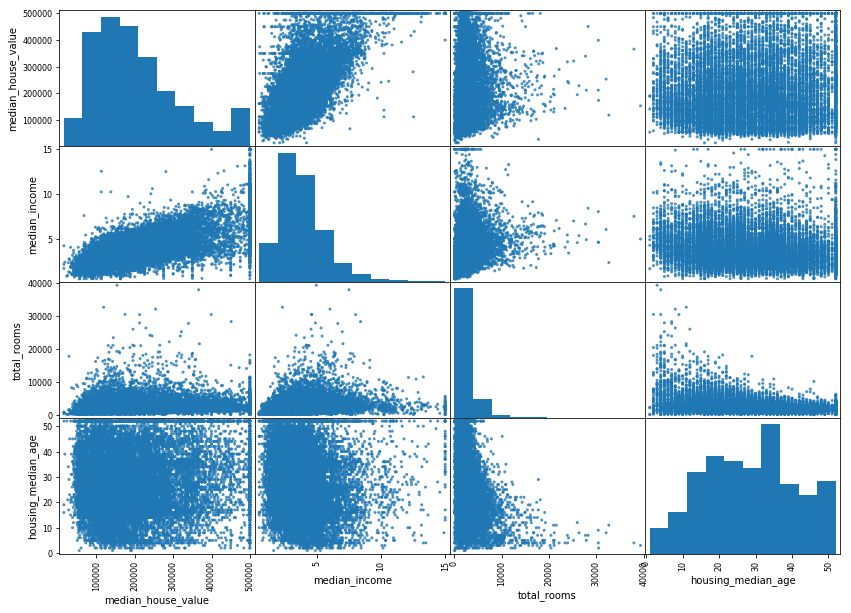

In [18]:
# Plot scatter matrix using pandas scatter_matrix() method
# Selcted attributes: median_house_value, median_income, total_rooms, housing_median_age    
from pandas.plotting import scatter_matrix
attributes = train_set_copy[["median_house_value", "median_income", "total_rooms", "housing_median_age"]]
scatter_matrix(attributes, alpha=0.8, figsize=(14, 10))

<b>We have observed following insights from the scatter plot:</b>
1. There is a positive correlation (corr coef = 0.687742) between <b>median_house_value</b> and <b>median_income</b>. 
- The <b>total_rooms</b> in a particular district does not show a good correlation (corr coef = 0.135814) to the <b>median_house_value</b> if the population is not specified. The more relevant variable for the house price is the number of people in a house. Therefore, one may introduce a new feature <b>population_per_household</b>.
- The number of <b>rooms_per_household</b> are introduced.
- Also, the <b>bedrooms_per_rooms</b> are introduced.

### Combining new features: population_per_household, rooms_per_household, bedrooms_per_household

In [19]:
train_set_copy["population_per_household"] = train_set_copy["population"]/train_set_copy["households"]
train_set_copy["rooms_per_household"] = train_set_copy["total_rooms"]/train_set_copy["households"]
train_set_copy["bedrooms_per_rooms"] = train_set_copy["total_bedrooms"]/train_set_copy["total_rooms"]
train_set_copy.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15738    -122.42     37.78                17.0       1257.0           339.0   
3530     -118.54     34.26                22.0       5303.0           838.0   
5949     -117.86     34.14                36.0       3097.0           667.0   
8420     -118.34     33.93                37.0       1638.0           407.0   
2672     -115.62     33.04                17.0       1009.0           231.0   

       population  households  median_income  median_house_value  \
15738      1093.0       384.0         1.8438             72500.0   
3530       2372.0       807.0         5.6912            311800.0   
5949       1484.0       634.0         3.1905            235300.0   
8420       1341.0       369.0         3.0677            167700.0   
2672        745.0       217.0         2.0463             61200.0   

      ocean_proximity  ocean_proximity_code  population_per_household  \
15738        NEAR BAY                   3.0                  2.846354   
3530        <1H OCEAN                   0.0                  2.939281   
5949           INLAND                   1.0                  2.340694   
8420        <1H OCEAN                   0.0                  3.634146   
2672           INLAND                   1.0                  3.433180   

       rooms_per_household  bedrooms_per_rooms  
15738             3.273438            0.269690  
3530              6.571252            0.158024  
5949              4.884858            0.215370  
8420              4.439024            0.248474  
2672              4.649770            0.228940

Let's look at the correlation matrix

In [20]:
# train_set_copy.corr()
# plot the correlation matrix
fig = px.imshow(train_set_copy.corr(), height=600, width=800)
fig.write_image("../results/california_housing_prices_trainset_correlation_combined.png")
fig.show()

1. We have observed a good relationship only between the <b>median_house_value</b> and the <b>median_income</b> (corr coef = 0.6877422).
- A negative correlation between the <b>median_house_value</b> and the <b>bedrooms_per_rooms</b> (corr coef = 0.2541385).
- We’ll now focus on the correlation between <b>median_house_value</b> and the <b>median_income</b>.

Text(0.5, 0.98, 'House price vs median income')

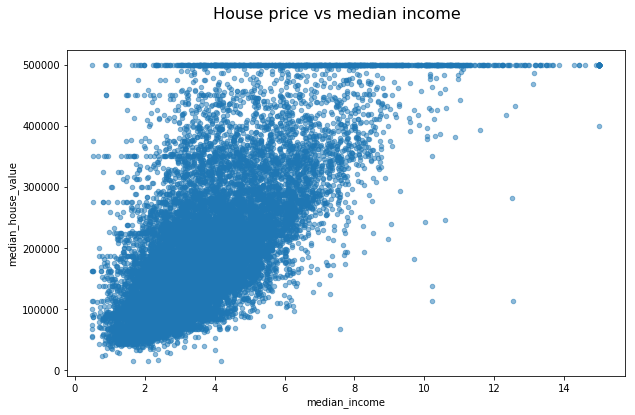

In [21]:
# Plot scatter matrix using pandas scatter_matrix() method
# Attributes: median_house_value and median_income   
train_set_copy.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, figsize=(10, 6))
plt.suptitle("House price vs median income", fontsize=16)

## Preparing Data for Modeling

#### Create train set and test set

In [22]:
train_set.drop(columns="ocean_proximity_code", inplace=True)
test_set.drop(columns="ocean_proximity_code", inplace=True)

In [23]:
# Create training set 
x_train = train_set.drop("median_house_value",axis=1)   
y_train = train_set["median_house_value"].copy()
x_train.shape, y_train.shape
# x_train.columns

((16512, 9), (16512,))

In [24]:
# Create test set 
x_test = test_set.drop("median_house_value",axis=1)   
y_test = test_set["median_house_value"].copy()
x_test.shape, y_test.shape

((4128, 9), (4128,))

#### Handling missing values

In [25]:
#missing data
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total 
        
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#     missing_data.plot(kind='bar',y='Total',figsize=(10,6),fontsize=20)
    print(missing_data)

In [26]:
# Handling missing values
# print(train_set.isnull().sum().sort_values(ascending=False))

In [27]:
report_missing_data(x_train)

                    Total  Percent
total_bedrooms        161      1.0
ocean_proximity         0      NaN
median_income           0      NaN
households              0      NaN
population              0      NaN
total_rooms             0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN


In [28]:
report_missing_data(x_test)

                    Total  Percent
total_bedrooms         46      1.0
ocean_proximity         0      NaN
median_income           0      NaN
households              0      NaN
population              0      NaN
total_rooms             0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN


Only the <b>total_bedrooms</b> contains missing values. In three ways, we can deal with these missing values:
1. We can remove entire column <b>total_bedrooms</b>, which has missing values, using pandas <b>drop()</b> method.
- We can remove all the rows with missing values using pandas <b>dropna()</b> method, but not the entire column <b>total_bedrooms</b>.
- We can impute or replace all the missing values with "<b>another value</b>" using pandas <b>fillna()</b> method.

What is this "<b>another value</b>" and how to decide this value?  
- As the <b>total_bedrooms</b> is a numeric feature column, we can replace the missing values with central tendency measures such as <b>mean</b>, <b>median</b>, or <b>mode</b>.
- In order to decide the right technique (<b>mean</b>, <b>median</b>, or <b>mode</b>), plot the ditribution of the <b>total_bedrooms</b> column.
- Use <b>mean</b> value to replace the missing values in case the data distribution is symmetric.
- Use <b>median</b>, or <b>mode</b> with skewed data distribution.

Text(0.5, 1.0, 'Test set')

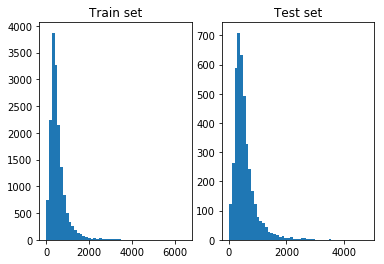

In [30]:
# Plot the distribution of total_bedrooms for both train and test data set
# train_set["total_bedrooms"].hist(bins=50, )
fig = plt.figure()
axes1 = fig.add_subplot(1, 2, 1)
axes1.hist(train_set["total_bedrooms"], bins=50)
axes1.set_title("Train set")

axes2 = fig.add_subplot(1, 2, 2)
axes2.hist(test_set["total_bedrooms"], bins=50)
axes2.set_title("Test set")

As the distribution of the feature <b>total_bedrooms</b> are right skewed, we will use <b>median</b> to replace the missing values. 

In [31]:
# Imputing or replacing missing values with median value
x_train["total_bedrooms"].fillna(train_set["total_bedrooms"].median(), inplace=True)
x_test["total_bedrooms"].fillna(test_set["total_bedrooms"].median(), inplace=True)
print(x_train.isnull().sum())
print("\n")
print(x_test.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


#### Handling categorical data

Now, we will drop features <b>ocean_proximity</b> from the train and test data set

In [32]:
x_train['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
x_train_num = x_train.drop('ocean_proximity', axis=1)
num_features = list(x_train_num)
num_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

## Creating pipeline

1. Define the individual components of the pipeline
- Combine these individual components using <b>sklearn.pipeline.FeatureUnion()</b>

### Implement the individual components

Implement <b>CombinedAttributesAdder</b> component that gives flexibility to add extra attributes to the pipeline

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# this component gives flexibility to add extra attributes to the pipeline

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    Gives flexibility to add extra attributes to the pipeline.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]

Implement label binarizer converter component <b>CategoricalEncoder</b> for encoding categorical data

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import Imputer   
from sklearn.pipeline import FeatureUnion
#CategoricalEncoder(encoding='onehot-dense')


from sklearn.base import BaseEstimator,TransformerMixin
#select columns and transit to array

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
    


Implement <b>DataFrameSelector</b> component that gives flexibility to select entire or partial dataframe based on which attributes we want in our pipeline

In [38]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_names):
        self.feature_names = feature_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.feature_names].values

Separate numerical and categorical attributes/features

In [39]:
num_attr = list(x_train_num)
cat_attr = ["ocean_proximity"]
print("Numerical attributes: {}".format(num_attr))
print("categorical attributes: {}".format(cat_attr))
# print(x_train.values)

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# x_train_extra_attr = attr_adder.transform(x_train.values)
# x_train_extra_attr

Numerical attributes: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
categorical attributes: ['ocean_proximity']


Define pipeline

In [40]:
# Import required packages for defining pipeline
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import FeatureUnion

Create a <b>numerical pipeline</b> with following components:
1. <b>DataFrameSelector</b> - to select the attributes
- <b>StandardScaler</b> - to bring all attributes to the same level

In [41]:
# Create numerical pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attr)),
                        ('std_scaler', StandardScaler())])

Create a <b>categorical</b> pipeline with following components:
1. <b>DataFrameSelector</b> - to select the attributes
- <b>CategoricalEncoder</b> - to convert categorical labels to numerical labels

In [42]:
# Create categorical pipeline
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attr)),
                        ('cat_encoder', CategoricalEncoder())])

Create full pipeline by concatenating all pipelines using <b>FeatureUnion</b>

In [43]:
# Create full pipeline by concatenating all pipelines using FeatureUnion
dp_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

##### Prepare entire training data set using pipeline

In [44]:
x_train_prepared = dp_pipeline.fit_transform(x_train)
print(x_train_prepared.shape)
type(x_train_prepared)

(16512, 13)


scipy.sparse.csr.csr_matrix

## Select and train a Machine Learning model

### 1. Linear regression with k-fold cross validation

In k-fold cross validation, 
- Training data is divided into k folds.
- Trains and evaluates a decision tree model k times
- Result is an array of k scores 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
linear_regr = LinearRegression()
linear_regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Calculate score
lr_score = cross_val_score(linear_regr, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

In [47]:
# Calculate root mean squared error, scores is an array of negative numbers
lr_rmse = np.sqrt(-lr_score)
lr_rmse

array([72348.46527912, 65204.13675649, 68030.66363414, 67143.65805108,
       69736.27356719, 69392.52321832, 67933.13329351, 67403.05975854,
       67698.77971198, 68145.87463771])

In [49]:
# Let’s print the mean and standard deviation of the scores
print("Mean: {}".format(lr_rmse.mean()))
print("Standard Deviation: {}".format(lr_rmse.std()))

Mean: 68303.65679080851
Standard Deviation: 1787.8696143699883


Conclusions:
- The median_housing_values lie within 120,000 and 265,000. 
- So a typical prediction error of $68,303 with ±1787 is    not very satisfying.
- This is an example of a model under-fitting the training data.
- When this happens it means that the features do not provide enough information to make good predictions. 
- The model is not powerful enough to make good predictions. 

### 2. Decision Tree Regressor with K-fold cross validation

In [50]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()

# Calculate score
dt_score = cross_val_score(dec_tree_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

# Calculate root mean squared error, scores is an array of negative numbers
dt_rmse = np.sqrt(-dt_score)

# Let’s print the mean and standard deviation of the scores
print("Mean: {}".format(dt_rmse.mean()))
print("Standard Deviation: {}".format(dt_rmse.std()))

Mean: 68237.8680082082
Standard Deviation: 2248.577439109789


Conclusions: 
- The prediction error of $68,237 with ±2248 
- The model performing a little worse than the linear regression model.

### 3. Ensemble Learning — Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(x_train_prepared, y_train)

# random_forest_reg 
# Calculate score
rf_score = cross_val_score(random_forest_reg, x_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

# Calculate root mean squared error, scores is an array of negative numbers
rf_rmse = np.sqrt(-rf_score)

# Let’s print the mean and standard deviation of the scores
print("Mean: {}".format(rf_rmse.mean()))
print("Standard Deviation: {}".format(rf_rmse.std()))

/Users/santanusarma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Mean: 51371.33893800732
Standard Deviation: 1756.5289167298606


Conclusions:
- The prediction error of $51,371 with ±1756.
- Ensemble learning with Random Forest looks very promising and performs the best out of the three.
- Building a model on top of other model is called Ensemble learning.  

### 4. Fine tune the Random Forest model with Hyper parameters 

- Optimizate the model by tweaking Hyper-parameters
- Use an automatic scikit learn GridSearchCV tool
- Apply it on our RandomForest model

In [55]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
# ]

- In the first row of param_grid we are saying to try 3 X 4 = 12 combinations
- In the second row we are saying to try 2 X 3 = 6 combinations with bootstrap false
- So in all we do 12 + 6 = 18 combinations

We’ll do a cross-validation(cv) of 5 folds

In [ ]:
# random_forest_tuned = RandomForestRegressor()
# grid_search = GridSearchCV(random_forest_tuned, param_grid, scoring="neg_mean_squared_error", cv=5)
# grid_search.fit(x_train_prepared, y_train)

# grid_search
# Print the parameters
# print("Parameters: {}".format(grid_search.best_estimator_))

## Evaluation

In [58]:
# Prepare the test data
x_test_prepared = dp_pipeline.transform(x_test)
print(x_test_prepared.shape)
type(x_test_prepared)

(4128, 13)


scipy.sparse.csr.csr_matrix

##### Predictions 

In [65]:
# Evaluate linear regression model
# Fit the model
coeff = linear_regr.fit(x_train_prepared, y_train)

# Find the predicted value using linear regression
y_hat = linear_regr.predict(x_test_prepared)

# Estimate the error
mse = mean_squared_error(y_test, y_hat)

# Find root mean squared error
rmse = np.sqrt(mse)

rmse

70786.69044212403

In [67]:
# Evaluate decision tree regressor model
# Fit the model
coeff = dec_tree_reg.fit(x_train_prepared, y_train)

# Find the predicted value using decision tree regressor
y_hat_ = dec_tree_reg.predict(x_test_prepared)

# Estimate the error
mse = mean_squared_error(y_test, y_hat_)

# Find root mean squared error
rmse = np.sqrt(mse)

rmse

67915.92522644166

In [63]:
# Find the predicted value using random forest
predicted_y = random_forest_reg.predict(x_test_prepared)

# Estimate the error
mse = mean_squared_error(y_test, predicted_y)

# Find root mean squared error
rmse = np.sqrt(mse)

rmse

52668.2123206797

Conclusion:

<b>Random Forest Regresssor model has performed better prediction out of these three</b>.